<h3> Import Dataset </h3>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h3> Check Missing Value </h3>

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h3> handling missing value </h3>

In [20]:
df.dropna(subset=['country', 'date_added'], inplace=True)  
df.isnull().sum()   

show_id            0
type               0
title              0
director        2216
cast             671
country            0
date_added         0
release_year       0
rating             3
duration           3
listed_in          0
description        0
dtype: int64

<h3>Data Visualization</h3>

In [21]:
grouped = df.groupby('type')['show_id'].count()
grouped

type
Movie      5691
TV Show    2276
Name: show_id, dtype: int64

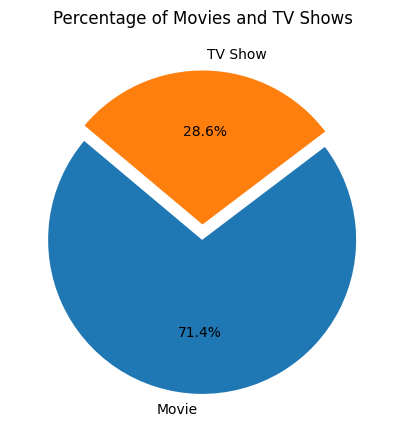

In [22]:
plt.figure(figsize=(10,5))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('Percentage of Movies and TV Shows')
plt.show()

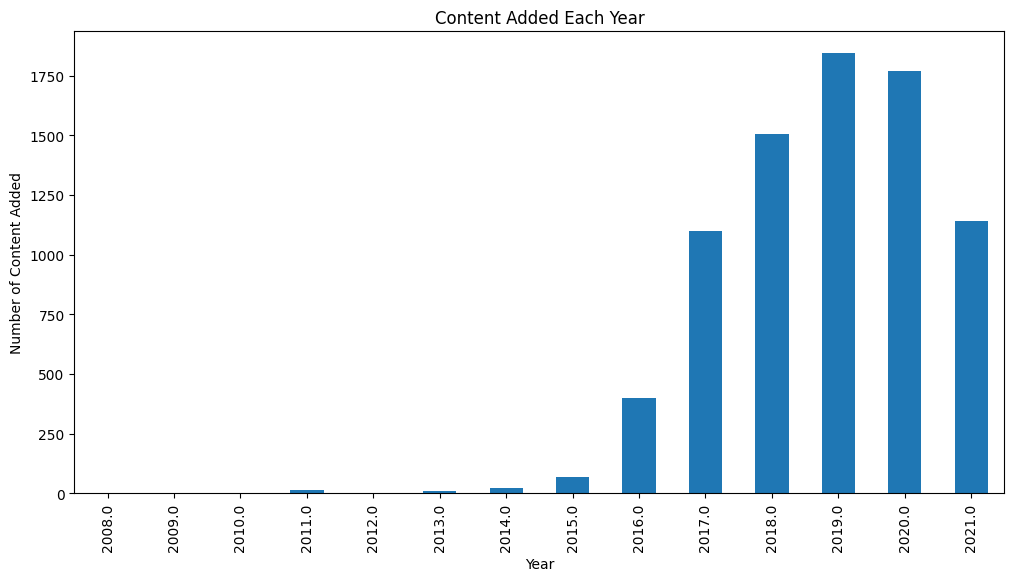

In [23]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
yearly_content = df['year_added'].value_counts().sort_index()
yearly_content.plot(kind='bar', figsize=(12,6))
plt.title('Content Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Content Added')
plt.show()

Text(0, 0.5, 'Number of Content Added')

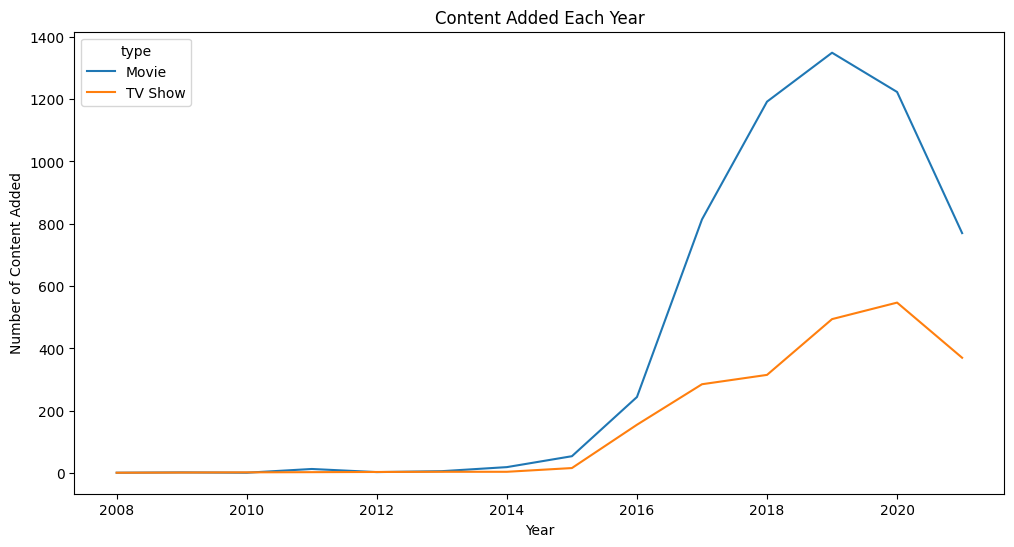

In [25]:
content_per_year = df.groupby(['type', 'year_added'])['show_id'].count().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='year_added', y='show_id', hue='type', data=content_per_year)
plt.title('Content Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Content Added')